# Homework set 3

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 20, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0

Guoda Paulauskaite 12255076 & Chayenne Olumuyiwa 12055662

Run the following cell to import NumPy and Pyplot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

# Exercise 1

In this exercise you will study the accuracy of several methods for computing the QR decomposition. You are asked to implement these methods yourself. (However, when testing your implementation you may compare with an external implementation.)


## (a) 
Implement the classical and modified Gram-Schmidt procedures for computing the QR decomposition.

Include a short documentation using triple quotes: describe at least the input and the output, and whether the code modifies the input matrix.


In [2]:
def classical_gram_schmidt(A):
    """
    Computes the QR decomposition via the classical Gram-Schmidth method, without modifying input matrix A.
    
    Input: Matrix A 
    Output: Orthogonal matrix Q and upper triangular matrix R

    """
    
    #Initialize matrix Q and R 
    n = len(A)
    Q = np.zeros((n,n))
    R = np.zeros((n,n))

    #Loop over the columns in A
    for i in range(n):
        Q[i] = A[:, i]
        for j in range(i):
            #Compute the elements of matrix Q and R
            element_r = np.dot(Q[j], A[:, i])
            R[j, i] = element_r
            Q[i] -= element_r * Q[j]
        R[i, i] = np.linalg.norm(Q[i])
        Q[i] /= R[i, i]
    Q = Q.transpose()

    return Q, R

def modified_gram_schmidt(A):
    """
    Computes the QR decomposition via the modified Gram-Schmidt method, modifying input matrix A.

    Input: Matrix A
    Output: Orthogonal matrix Q and upper triangular matrix R
    """
    n = len(A)
    
    #Initialize R and convert int matrix A to a float if needed
    if A.dtype == int:
        A = A.astype(float, copy=False)
    R = np.zeros((n, n))

    for i in range(n):
        R[i, i] = np.linalg.norm(A[:, i])

        # Update matrix A
        A[:, i] /= R[i, i]

        for j in range(i + 1, n):
            R[i, j] = np.dot(A[:, i], A[:, j])
            A[:, j] -= R[i, j] * A[:, i]

    return A, R

In [3]:
A = np.array([[1,2,3],
              [2,4,5],
              [10,5,3]])

Q1, R1 = classical_gram_schmidt(A)
Q2, R2 = modified_gram_schmidt(A)

print(f"For the classical Gram-Schmidt method we find \nQ =\n {Q1} \nand R = \n{R1} \n\nfor the modified Gram-Schmidth method we find \nQ = \n{Q2} and \nR = \n{R2}.")

For the classical Gram-Schmidt method we find 
Q =
 [[ 9.75900073e-02  4.36435780e-01  8.94427191e-01]
 [ 1.95180015e-01  8.72871561e-01 -4.47213595e-01]
 [ 9.75900073e-01 -2.18217890e-01  1.98602732e-15]] 
and R = 
[[10.24695077  5.85540044  4.19637031]
 [ 0.          3.27326835  5.01901148]
 [ 0.          0.          0.4472136 ]] 

for the modified Gram-Schmidth method we find 
Q = 
[[ 9.75900073e-02  4.36435780e-01  8.94427191e-01]
 [ 1.95180015e-01  8.72871561e-01 -4.47213595e-01]
 [ 9.75900073e-01 -2.18217890e-01  2.48253415e-15]] and 
R = 
[[10.24695077  5.85540044  4.19637031]
 [ 0.          3.27326835  5.01901148]
 [ 0.          0.          0.4472136 ]].


## (b) (a+b 3.5 pts)
Let $H$ be a Hilbert matrix of size $n$ (see Computer Problem 2.6). Study the quality of the QR decompositions obtained using the two methods of part (a), specifically the loss of orthogonality. In order to do so, plot the quantity $\| I - Q^T Q \|$ as a function of $n$ on a log scale. Vary $n$ from $2$ to $12$.



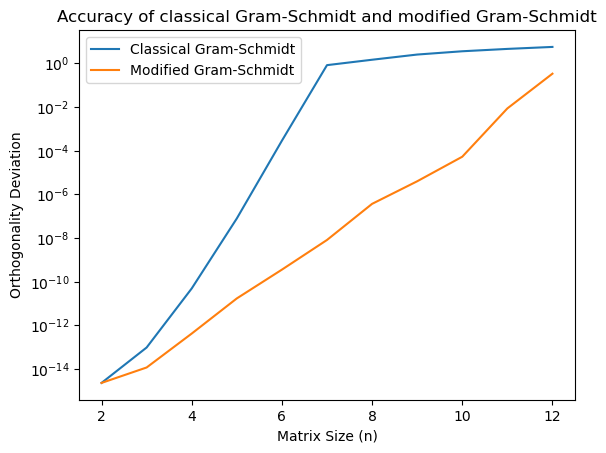

In [4]:
def orthogonality_measure (Q, I):
    accuracy =  np.linalg.norm(I - np.dot(Q, Q.transpose()))
    return accuracy

#Define initial values
n_values = range(2,13)
ortho_measures_1 = []
ortho_measures_2 = []

for n in n_values:
    H = hilbert(n)
    I = np.identity(n)
    
    Q1, _ = classical_gram_schmidt(H)
    Q2, _ = modified_gram_schmidt(H)
    
    #Calculate quantity of |I - Q^tQ| for the different methods
    ortho_measure_1 = orthogonality_measure(Q1, I)
    ortho_measure_2 = orthogonality_measure(Q2, I)
    
    ortho_measures_1.append(ortho_measure_1)
    ortho_measures_2.append(ortho_measure_2)

    
plt.plot(n_values, ortho_measures_1, label='Classical Gram-Schmidt')
plt.plot(n_values, ortho_measures_2, label='Modified Gram-Schmidt')
plt.yscale('log')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Orthogonality Deviation')
plt.title('Accuracy of classical Gram-Schmidt and modified Gram-Schmidt')
plt.legend()
plt.show()

## (c) (1.5 pts)
Try applying the classical procedure twice. Plot again the loss of orthogonality when computing the QR decomposition of the Hilbert matrix of size $n$ as in (b).


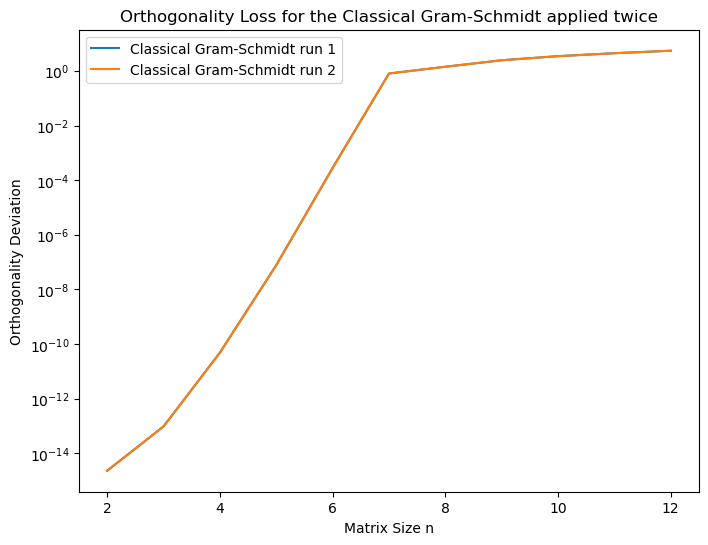

In [5]:
n_values = range(2,13)
ortho_measures_1 = []
ortho_measures_2 = []


for n in range(2,13):
    H = hilbert(n)
    I = np.identity(n)
    
    Q1, _ = classical_gram_schmidt(H)
    Q2, _ = classical_gram_schmidt(H)
    
    #TODO: Calculate quantity of I - Q^tQ
    ortho_measure_1 = orthogonality_measure(Q1, I)
    ortho_measure_2 = orthogonality_measure(Q2, I)
    
    ortho_measures_1.append(ortho_measure_1)
    ortho_measures_2.append(ortho_measure_2)

    
plt.figure(figsize=(8, 6))
plt.plot(n_values, ortho_measures_1, label='Classical Gram-Schmidt run 1')
plt.plot(n_values, ortho_measures_2, label='Classical Gram-Schmidt run 2')
plt.yscale('log')
plt.xlabel('Matrix Size n')
plt.ylabel('Orthogonality Deviation')
plt.title('Orthogonality Loss for the Classical Gram-Schmidt applied twice')
plt.legend()
plt.show()

## (d) (2 pts)
Implement the Householder method for computing the QR decomposition. Remember to include a short documentation.

In [6]:
def householder_qr(A):
    """
    Compute the QR decomposition of matrix A using the Householder method. 
    The Householder method uses a sequence of orthogonal matrices to transform the given matrix A to QR form. 

    Input: Matrix A
    Output: Orthogonal matrix Q and upper triangular matrix R
    """
    
    #Initialize R and convert int matrix A to a float if needed
    if A.dtype == int:
        A = A.astype(float, copy=False)
    
    n = len(A)
    R = A.copy()
    Q = np.identity(n)
    
    for i in range(n-1):
        a = R[i:, i]
        e1 = np.zeros(len(a))
        e1[0] = 1.0
        
        #Check the sign of the first column element to determine the sign of alpha 
        alpha = -np.sign(a[0]) * np.linalg.norm(a)
        
        #Compute householder vector V
        v = a - (alpha * e1)
        v /= np.linalg.norm(v)

        # Apply Householder transformation to R
        R[i:, i:] -= 2 * np.outer(v, np.dot(v, R[i:, i:]))

        # Apply Householder transformation to Q
        Q[:, i:] -= 2 * np.outer(Q[:, i:].dot(v), v)

    return Q, R

Qh, Rh = householder_qr(A)
print(f"For the householder QR method we find \nQ =\n {Qh} \nand R = \n{Rh}")

For the householder QR method we find 
Q =
 [[-9.75900073e-02 -4.36435780e-01 -8.94427191e-01]
 [-1.95180015e-01 -8.72871561e-01  4.47213595e-01]
 [-9.75900073e-01  2.18217890e-01 -5.55111512e-17]] 
and R = 
[[-1.02469508e+01 -5.85540044e+00 -4.19637031e+00]
 [ 0.00000000e+00 -3.27326835e+00 -5.01901148e+00]
 [ 0.00000000e+00 -2.22044605e-16 -4.47213595e-01]]


## (e) (2 pts)
Perform the analysis of (b) for the Householder method. Discuss the differences between all the methods you have tested so far. Look online and/or in books for information about the accuracy of the different methods and include this in your explanations (with reference).


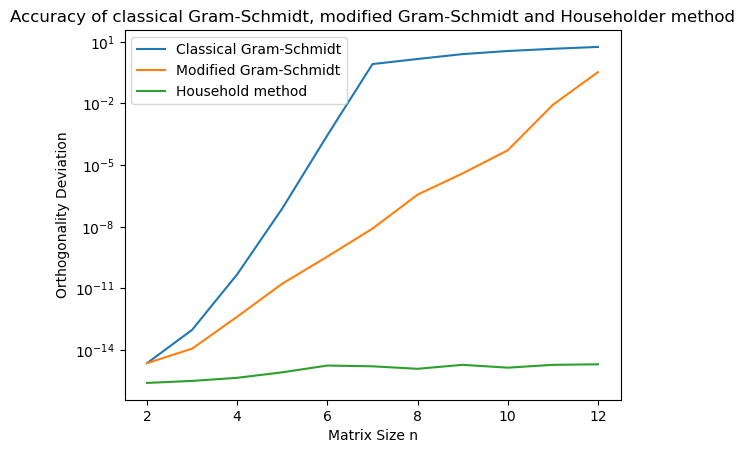

In [8]:
#Initialize values
n_values = range(2,13)
ortho_measures_1 = []
ortho_measures_2 = []
ortho_measures_3 = []

for n in range(2,13):
    H = hilbert(n)
    I = np.identity(n)
    
    #Compute the Q, R matrices with the different methods
    Q1, _ = classical_gram_schmidt(H)
    Q2, _ = modified_gram_schmidt(H)
    Q3, _ = householder_qr(H)
    
    #Compute and save their accuracy measures
    ortho_measure_1 = orthogonality_measure(Q1, I)
    ortho_measure_2 = orthogonality_measure(Q2, I)
    ortho_measure_3 = orthogonality_measure(Q3, I)
    
    ortho_measures_1.append(ortho_measure_1)
    ortho_measures_2.append(ortho_measure_2)
    ortho_measures_3.append(ortho_measure_3)

plt.plot(n_values, ortho_measures_1, label='Classical Gram-Schmidt')
plt.plot(n_values, ortho_measures_2, label='Modified Gram-Schmidt')
plt.plot(n_values, ortho_measures_3, label='Household method')
plt.yscale('log')
plt.xlabel('Matrix Size n')
plt.ylabel('Orthogonality Deviation')
plt.title('Accuracy of classical Gram-Schmidt, modified Gram-Schmidt and Householder method')
plt.legend()
plt.show()

In the above figure we can see that both Gram-Schmidt methods display an exponential loss of ortogonality with an increasing matrix size $n$, where the Householder method remains somewhat small. The classical Gram-Schmidt method shows the highest deviation from orthogonality out of all three methods. We also observe that it increases the steepest for an increase in matrix size n, and somewhat stabilizes after matrix size $n$ reaches 7. For $n = 2$, all three methods perform the same.

In the figure we see that on the log-scale, the orthogonality of matrix Q remains more or less stable for the Househoder method. The householder method is often numerically the most acurate method for finding orthogonal matrix Q. Both the classical and modified Gram-Schmidt procedures are categorized as "triangular orthogonalization", and with an ill-conditioned matrix $R$, they compute the non-orthogonal vector $Q$ _(Stewart, 1998)(Trefethen, 1997)_. This is fixable by re-orthogonalization, which we did not implement in our code.

Where the CGS and MGS are labeled "triangular orthogonalization", the Householder method is "orthogonal triangularization" (Stewart, 1998). Where the Gram-Schmidt method is working with projections computed through triangular matrices, making the resulting vectors $Q_i$ prone to rounding errors reproduced through each usage of $R$ _(Stewart, 1998)(Trefethen, 1997)_, the Householder vectors are computed through orthogonal matrix Q with standard condition number 1, leaving smaller opportunity for errors _(Stewart, 1998)_. 

We lastly see that the modified Gram-Schmidt shows a smaller loss of orthogonality than the classical one. This cana be explained by the fact that in the modified Gram-Schmidt method, vectors are immediately orthogonalized, implying less computational steps for errors to occur. On thop of this, the modified method is continuously updating and computing matrix Q, leaving less space for errors in the later columns to accumulate. _(Stewart, 1998)_. 



<br>
<br>
<br>


Stewart, G. W. (1998). Matrix Algorithms: Volume 1, Basic Decompositions. Society for Industrial Mathematics. ISBN: 0898714141 
<br>
Trefethen, L. N., Bau, D. (1997). Numerical Linear Algebra. SIAM. ISBN: 0898713617 
